In [76]:
import pandas as pd
import pymysql
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [96]:
df = pd.read_excel('C:/Users/byelb/OneDrive/바탕 화면/새싹/낙찰가 예상 프로그램 프로젝트/최근 1년 월별 경매건수.xlsx')

df

,년도,경매건수,매각건수,매각율,매각가율
0,2022-08-01,21,5,23.8,98.6
1,2022-09-01,40,7,17.5,95.0
2,2022-09-01,40,7,17.5,95.0
3,2022-10-01,53,8,15.1,92.8
4,2022-11-01,82,12,14.6,84.5
5,2022-12-01,42,8,19.0,68.8
6,2023-01-01,49,15,30.6,85.9
7,2023-02-01,61,23,37.7,79.3
8,2023-03-01,54,15,27.8,74.0
9,2023-04-01,60,8,13.3,76.8


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   년도      13 non-null     datetime64[ns]
 1   경매건수    13 non-null     int64         
 2   매각건수    13 non-null     int64         
 3   매각율     13 non-null     float64       
 4   매각가율    13 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 652.0 bytes


In [98]:
df.columns = ['month','auction_total','auction_sale','sale_per','price_per']
df

,month,auction_total,auction_sale,sale_per,price_per
0,2022-08-01,21,5,23.8,98.6
1,2022-09-01,40,7,17.5,95.0
2,2022-09-01,40,7,17.5,95.0
3,2022-10-01,53,8,15.1,92.8
4,2022-11-01,82,12,14.6,84.5
5,2022-12-01,42,8,19.0,68.8
6,2023-01-01,49,15,30.6,85.9
7,2023-02-01,61,23,37.7,79.3
8,2023-03-01,54,15,27.8,74.0
9,2023-04-01,60,8,13.3,76.8


In [99]:
df['month'] = df['month'].dt.strftime('%Y-%m')
df

,month,auction_total,auction_sale,sale_per,price_per
0,2022-08,21,5,23.8,98.6
1,2022-09,40,7,17.5,95.0
2,2022-09,40,7,17.5,95.0
3,2022-10,53,8,15.1,92.8
4,2022-11,82,12,14.6,84.5
5,2022-12,42,8,19.0,68.8
6,2023-01,49,15,30.6,85.9
7,2023-02,61,23,37.7,79.3
8,2023-03,54,15,27.8,74.0
9,2023-04,60,8,13.3,76.8


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          13 non-null     object 
 1   auction_total  13 non-null     int64  
 2   auction_sale   13 non-null     int64  
 3   sale_per       13 non-null     float64
 4   price_per      13 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 652.0+ bytes


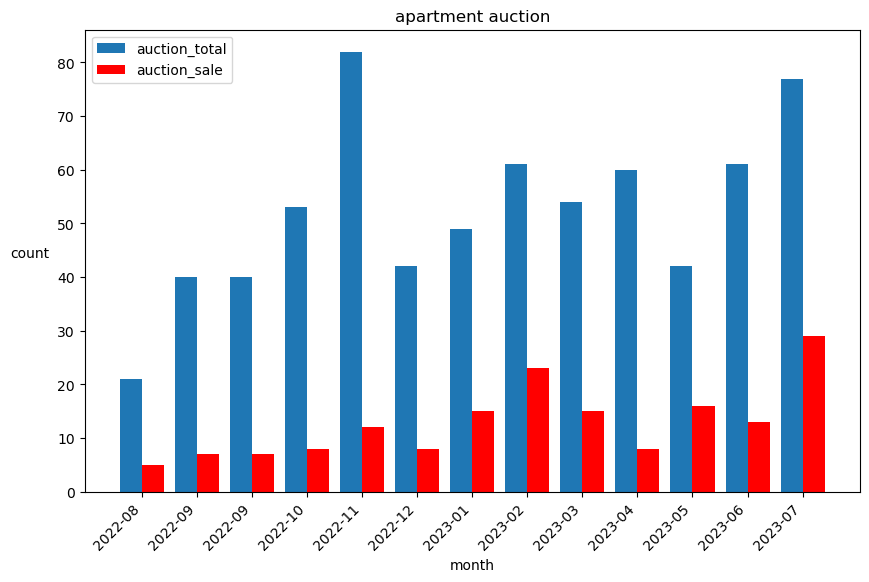

In [105]:
plt.figure(figsize=(10, 6))


bar_width = 0.4

plt.bar(df.index - bar_width/2, df['auction_total'], width=bar_width, label='auction_total')
plt.bar(df.index + bar_width/2, df['auction_sale'], width=bar_width,color='red', label='auction_sale')

plt.xticks(df.index, df['month'], rotation=45, ha='right')


plt.title('apartment auction')
plt.xlabel('month')
plt.ylabel('count',rotation=0, labelpad=20)

plt.legend()


plt.show()

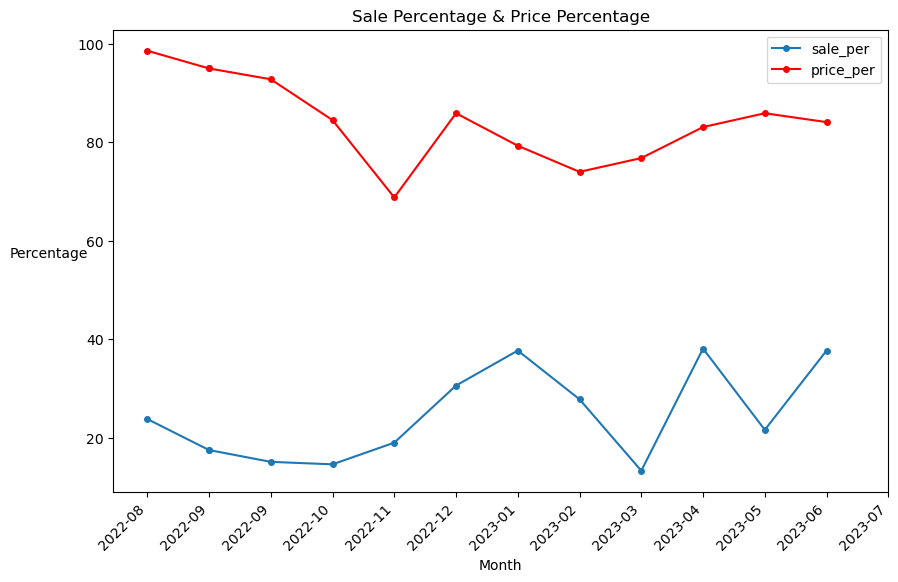

In [104]:
plt.figure(figsize=(10, 6))



plt.plot(df['month'], df['sale_per'], marker='o',markersize=4, label='sale_per')
plt.plot(df['month'], df['price_per'], marker='o',markersize=4,color='red', label='price_per')

plt.xticks(df.index, df['month'], rotation=45, ha='right')


plt.title('Sale Percentage & Price Percentage')
plt.xlabel('Month')
plt.ylabel('Percentage', rotation=0, labelpad=20)
plt.legend()